In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocess
from sklearn.linear_model import LogisticRegression

In [2]:
nowpath=os.path.abspath('.')
bankdt=pd.read_csv(nowpath+'/bankout.csv',sep=',',header=None,index_col=None)
bank_df=pd.DataFrame(data=bankdt.loc[1:,1:])
bank_df.index=bankdt.loc[1:,0]
bank_df.columns=bankdt.loc[0,1:]


E:\Programming\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#divide data into train and test randomly
train_np=np.array(bank_df)
cter=len(bank_df)
cttd=int(0.2*cter)
for k in range(cttd):
    r=np.random.randint(len(train_np))
    if 'test_np' not in dir():
        test_np=([train_np[r]])
    test_np=np.vstack((test_np,train_np[r]))
    train_np=np.delete(train_np,r,0)

In [4]:
train_df=pd.DataFrame(data=train_np,columns=bank_df.columns)
test_df=pd.DataFrame(data=test_np,columns=bank_df.columns)

In [5]:
X_train=train_df.drop('yy',1)
Y_train=train_df.yy.astype('int64')
LR=LogisticRegression(C=1e30)
LR.fit(X_train,Y_train)
feature_lr=LR.coef_

In [6]:
feature_lr_pd=pd.DataFrame(index=X_train.columns.values,data=feature_lr.transpose())

In [7]:
X_test=test_df.drop('yy',1)
Y_test=test_df.yy.astype('int64')
AcXt_Yt=LR.score(X_test,Y_test)
AcXt_Yt

0.9112648701141054

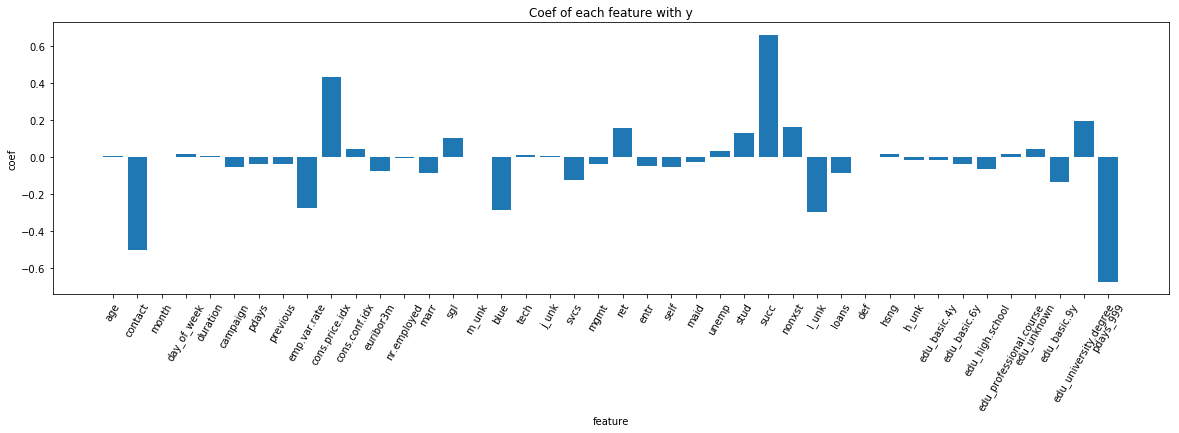

In [8]:
%matplotlib inline
fig,f1=plt.subplots(figsize=(20,5))
xtks=[x for x in range(0,len(feature_lr[0]),1)]
y=np.array(feature_lr_pd)
f1.set_xticks(xtks)
f1.set_xticklabels(feature_lr_pd.index,rotation=60)
f1.bar(xtks,y)
plt.xlabel('feature')
plt.ylabel('coef')
plt.title('Coef of each feature with y')
plt.show()

In [9]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize,StandardScaler


def xValLR(dataset, label_name, k, cs):
    X=dataset.drop(label_name,1)
    Y=dataset[label_name]
    #print(Y)
    k_fold = KFold(dataset.shape[0], n_folds = k)
    aucs={}
    for j, (train, test) in enumerate(k_fold):
        #print(X.loc[100000+train,:])
        #if j>0:
        #    continue #data is with bias, for the recent data is easier to be predicted
        for c in cs:
            LRcs=LogisticRegression(C=c)
            #sc = StandardScaler()
            tx=X.loc[train,:]
            ty=Y.loc[train].astype('int64') #Y is 1-dimensional!!
            #sc.fit(tx)
            #tx = sc.transform(tx)
            rx=X.loc[test,:]
            #rx = sc.transform(rx)
            ry=Y.loc[test].astype('int64')
            #print('tx'.format(j)+':'+str(len(tx)))
            LRcs.fit(tx,ty)
            fpr, tpr, thresholds = roc_curve(ry, LRcs.predict_proba(rx)[:,1])
            roc_auc = auc(fpr, tpr)
            new_auc='AUC_{}_{}'.format(c,j)#name of auc
            aucs[new_auc]=roc_auc
    #lr_grid_search = GridSearchCV(LogisticRegression(), param_grid_lr, cv = kfolds, scoring = 'roc_auc') 
    #lr_grid_search.fit(X, Y)
    return aucs

E:\Programming\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Programming\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
cs=np.array([10**(i) for i in range(-10,31,5)])
a=xValLR(bank_df,'yy',10,cs)

In [11]:
a

{'AUC_1000000000000000000000000000000_0': 0.97061567777120705,
 'AUC_1000000000000000000000000000000_1': 0.95486350936258091,
 'AUC_1000000000000000000000000000000_2': 0.97044563903092818,
 'AUC_1000000000000000000000000000000_3': 0.95685827433097315,
 'AUC_1000000000000000000000000000000_4': 0.9609151928296662,
 'AUC_1000000000000000000000000000000_5': 0.83947041031786807,
 'AUC_1000000000000000000000000000000_6': 0.8098232600141908,
 'AUC_1000000000000000000000000000000_7': 0.86813961372060466,
 'AUC_1000000000000000000000000000000_8': 0.8891370477105347,
 'AUC_1000000000000000000000000000000_9': 0.73655449055843958,
 'AUC_10000000000000000000000000_0': 0.97061567777120705,
 'AUC_10000000000000000000000000_1': 0.95183173385627262,
 'AUC_10000000000000000000000000_2': 0.969141791588363,
 'AUC_10000000000000000000000000_3': 0.95685827433097315,
 'AUC_10000000000000000000000000_4': 0.95872483965284827,
 'AUC_10000000000000000000000000_5': 0.83233008046567381,
 'AUC_100000000000000000000